In [15]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

from PIL import Image
import glob
import os

2.10.0
1.26.0


In [16]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


#리사이즈 함수 선언
#Pillow 함수 9.10부터 ANTIALIAS 사라지고 RANCZOS 함수 사용
	

In [17]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/scissor'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("가위 이미지 resize 완료!")


705  images to be resized.


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_6916\581946024.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


705  images resized.
가위 이미지 resize 완료!


In [18]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/rock'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("바위 이미지 resize 완료!")


572  images to be resized.


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_6916\581946024.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


572  images resized.
바위 이미지 resize 완료!


In [19]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/paper'
resize_images(image_dir_path)

# 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
print("보 이미지 resize 완료!")

550  images to be resized.


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_6916\581946024.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


550  images resized.
보 이미지 resize 완료!


In [20]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

#분류에 좋다는 교차검증 가져와보기

In [21]:


def load_data(img_path, number_of_data=1827):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(X)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper'


(X, y)=load_data(image_dir_path)
X_norm = X/255.0   # 입력은 0~1 사이의 값으로 정규화\

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

#흠... 매니폴드 하고싶은데
#어짜피 테스트 데이터는 다른거에서 가져올 예정

학습데이터(X)의 이미지 개수는 1827 입니다.
X shape: (1827, 112, 112, 3)
y shape: (1827,)


라벨:  0


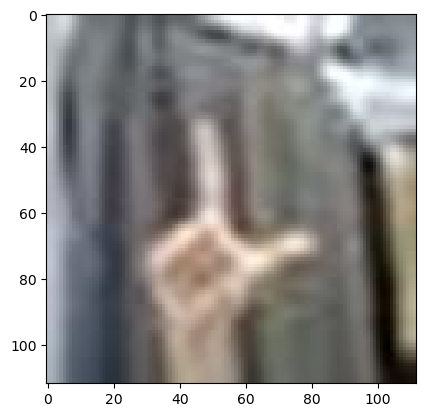

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X[112])
print('라벨: ', y[112])

#111번째 이미지와 라벨링 표현

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.layers import Dropout
#라이브러리 불러오고

In [24]:
#교차검증 데이터 분리
#5개로 나누고
n_fold = 5

#랜덤 시드 설정
#텐서에서 재현성 구현(공유시)
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

accuracy=[]

kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [25]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

for train, test in kfold.split(X,y):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(112,112,3)))
    model.add(keras.layers.AveragePooling2D(3,3))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.AveragePooling2D(3,3))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(keras.layers.Dense(3, activation='softmax'))

    model.summary()

    # model을 학습시키는 코드를 직접 작성해 보세요.
    # Hint! model.compile()과 model.fit()을 사용해 봅시다.
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    #모델 학습
    history = model.fit(X_norm[train], y[train], epochs=7, validation_data= (X_norm[test], y[test]))
    accuracy.append(history.history['val_accuracy'])
    
    


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 110, 110, 32)      896       
                                                                 
 average_pooling2d_10 (Avera  (None, 36, 36, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 average_pooling2d_11 (Avera  (None, 11, 11, 64)       0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 7744)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [26]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
#테스트 사진 리사이즈

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)


350  images to be resized.


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_6916\581946024.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


350  images resized.
380  images to be resized.
380  images resized.
351  images to be resized.
351  images resized.


In [27]:
#테스트 데이터셋 불러오기

def load_data_t(img_path, number_of_data=1081):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'C://Users/Desk_Kang/Desktop/Aiffel/workplace/Iamgroww/rock_scissor_paper/test'
(x_test, y_test)=load_data_t(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1081 입니다.
x_test shape: (1081, 112, 112, 3)
y_test shape: (1081,)


In [28]:

# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

34/34 - 1s - loss: 4.7370 - accuracy: 0.4422 - 784ms/epoch - 23ms/step
test_loss: 4.737013339996338
test_accuracy: 0.44218316674232483
